In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

## Importing dataset

In [6]:
prices = pd.read_csv('prices.csv')
rooms = pd.read_excel('room types.xlsx')
review = pd.read_table('reviews.tsv')

### Data Cleaning

**Price dataset cleaning**

In [3]:
# steps to follow
# 1. check for datatype of each attributes
# 2. remove dollars from price column
# 3. channge datatpe of price column into int
# 4. check for outlier in price column
# 5. split nbhood into bhorough and cities
# 6. check for duplicates

In [4]:
prices.info()

# change listing_id into string
# change price into int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25202 entries, 0 to 25201
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       25202 non-null  int64  
 1   listing_id       25202 non-null  int64  
 2   price            25202 non-null  int64  
 3   borough          25202 non-null  object 
 4   neighbourhood    25202 non-null  object 
 5   price_per_month  25202 non-null  float64
 6   latitude         25202 non-null  float64
 7   longitude        25202 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.5+ MB


In [5]:
prices.listing_id=prices.listing_id.astype('str')

In [6]:
# Converting price from object to int type

prices['price_dollars']=prices.price.str.split(' ').str.get(0).astype(int)
prices.drop('price',axis=1,inplace=True)

In [7]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     25209 non-null  object
 1   nbhood_full    25209 non-null  object
 2   price_dollars  25209 non-null  int32 
dtypes: int32(1), object(2)
memory usage: 492.5+ KB


In [8]:
# spliting nbhood into bhorough and areas

prices['boroughs'] = ''
prices['areas'] = ''
prices.loc[:,'boroughs']=prices.nbhood_full.str.split(',').str.get(0).str.strip()
prices.loc[:,'areas']=prices.nbhood_full.str.split(',').str.get(1).str.strip()

# drop nbhood_full

prices_updated1=prices.drop('nbhood_full',axis=1)

In [9]:
# checking for anomalys in the price column

prices_updated1.price_dollars.describe()

# filter price value = zero and drop them
# check the price distribution for outliers

count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price_dollars, dtype: float64

In [10]:
# Dropping price values less than zero

non_zero_price = prices_updated1['price_dollars']>0
prices_filtered1 = prices_updated1.loc[non_zero_price]
prices_filtered1.reset_index(drop = True,inplace =True)

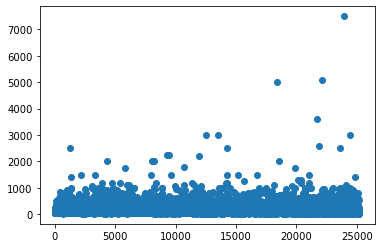

In [11]:
plt.scatter(range(len(prices_filtered1)),prices_filtered1['price_dollars'])

In [13]:
# filtering price below 7000

price_final=prices_filtered1[prices_filtered1['price_dollars']<=7000]

price_final.reset_index(drop=True,inplace=True)

In [14]:
# Cleaning room dataset

rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [15]:
# converting listing_id category into int to string

rooms.listing_id = rooms.listing_id.astype('str')

In [16]:
# checking for different room type category

rooms.room_type.unique()

array(['Entire home/apt', 'private room', 'Private room',
       'entire home/apt', 'PRIVATE ROOM', 'shared room',
       'ENTIRE HOME/APT', 'Shared room', 'SHARED ROOM'], dtype=object)

In [17]:
# convert categories into same format

rooms['room_type']=rooms.room_type.str.capitalize().astype('category')

In [18]:
# cleaning reviews dataset

review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [19]:
# converting listing_id from int into string

review.listing_id = review.listing_id.astype('str')

In [20]:
# split last review date into year, month and day

review['year_of_review']=pd.to_datetime(review.last_review).dt.strftime('%Y')
review['month_of_review']=pd.to_datetime(review.last_review).dt.strftime('%b')
review['day_of_review']=pd.to_datetime(review.last_review).dt.strftime('%d')


In [28]:
# Merging datasets

first_merge=price_final.merge(rooms,how='inner',on='listing_id')
final_data=first_merge.merge(review,how='inner',on='listing_id')

In [29]:
final_data

,listing_id,price_dollars,boroughs,areas,description,room_type,host_name,year_of_review,month_of_review,day_of_review
0,2595,225,Manhattan,Midtown,Skylit Midtown Castle,Entire home/apt,Jennifer,2019,May,21
1,3831,89,Brooklyn,Clinton Hill,Cozy Entire Floor of Brownstone,Entire home/apt,LisaRoxanne,2019,Jul,05
2,5099,200,Manhattan,Murray Hill,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt,Chris,2019,Jun,22
3,5178,79,Manhattan,Hell's Kitchen,Large Furnished Room Near B'way,Private room,Shunichi,2019,Jun,24
4,5238,150,Manhattan,Chinatown,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt,Ben,2019,Jun,09
...,...,...,...,...,...,...,...,...,...,...
25196,36425863,129,Manhattan,Upper East Side,Lovely Privet Bedroom with Privet Restroom,Private room,Rusaa,2019,Jul,07
25197,36427429,45,Queens,Flushing,No.2 with queen size bed,Private room,H Ai,2019,Jul,07
25198,36438336,235,Staten Island,Great Kills,Seas The Moment,Private room,Ben,2019,Jul,07
25199,36442252,100,Bronx,Mott Haven,1B-1B apartment near by Metro,Entire home/apt,Blaine,2019,Jul,07
